# JSON Project - Springboard

### Agenda:
###### 1. Find the 10 countries with most projects
###### 2. Find the top 10 major project themes (using column 'mjtheme_namecode')
###### 3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

*Import required packages and set the matplotlib inline magic setting*

In [1]:
%matplotlib inline
import pandas as pd
import json

*Load the JSON data into pandas dataframe and check the contents*

In [2]:
data_file = r'C:\Users\krish\DataScience\Springboard_Projects\1 - JSON\data_wrangling_json\data\world_bank_projects.json'
proj_data = pd.read_json(data_file)
proj_data.head(3)

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en


## 1. Find the 10 countries with most projects

In [3]:
# Get the count of repeating countries with value_counts() method of pandas Series
proj_counts = pd.DataFrame((proj_data.countrycode + ' -- ' + proj_data.countryshortname).value_counts())

# Convert the value counts series into dataframe for displaying results and plotting 
proj_counts.reset_index(inplace=True)
proj_counts.columns = ['Country','Num_Projects']
proj_counts = proj_counts.set_index('Country')
top_ten_countries = proj_counts.head(10)
top_ten_countries

,Num_Projects
Country,
ID -- Indonesia,19
CN -- China,19
VN -- Vietnam,17
IN -- India,16
"RY -- Yemen, Republic of",13
NP -- Nepal,12
BD -- Bangladesh,12
MA -- Morocco,12
MZ -- Mozambique,11


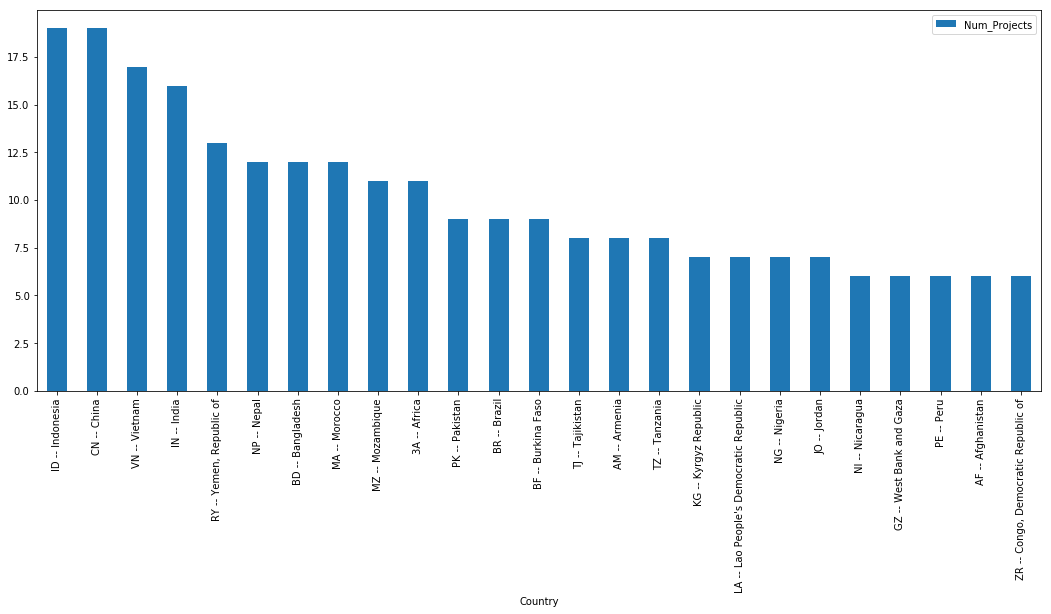

In [4]:
proj_counts.head(25).plot(kind='bar',figsize=(18,7))

## 2. Find the top 10 major project themes (using column 'mjtheme_namecode')

In [5]:
#Skip NaN entries by checking iterable property for looping
def isIterable(obj):
    try:
        iterator = iter(obj)
        return True
    except:
        return False

#Iniatialize empty dictionary
proj_codes = {}

#loop through the dataframe and dictionary to create counts dictionary for themes
for i in proj_data.mjtheme_namecode:
    if isIterable(i):
        for j in i:
            if j['code'] + ' -- ' + j['name'] in proj_codes:
                proj_codes[j['code'] + ' -- ' + j['name']] += 1
            else:
                proj_codes[j['code'] + ' -- ' + j['name']] = 1


# Convert the value counts series into dataframe for displaying results and plotting 
proj_codes_df = pd.DataFrame(list(proj_codes.items()))
proj_codes_df.columns = ['Project_Theme','Num_Countries']
proj_codes_df = proj_codes_df.set_index('Project_Theme')
proj_codes_df = proj_codes_df.sort_values(by='Num_Countries', ascending=False)

proj_codes_df.head(10)

,Num_Countries
Project_Theme,
11 -- Environment and natural resources management,223
10 -- Rural development,202
8 -- Human development,197
2 -- Public sector governance,184
6 -- Social protection and risk management,158
4 -- Financial and private sector development,130
7 -- Social dev/gender/inclusion,119
5 -- Trade and integration,72
9 -- Urban development,47


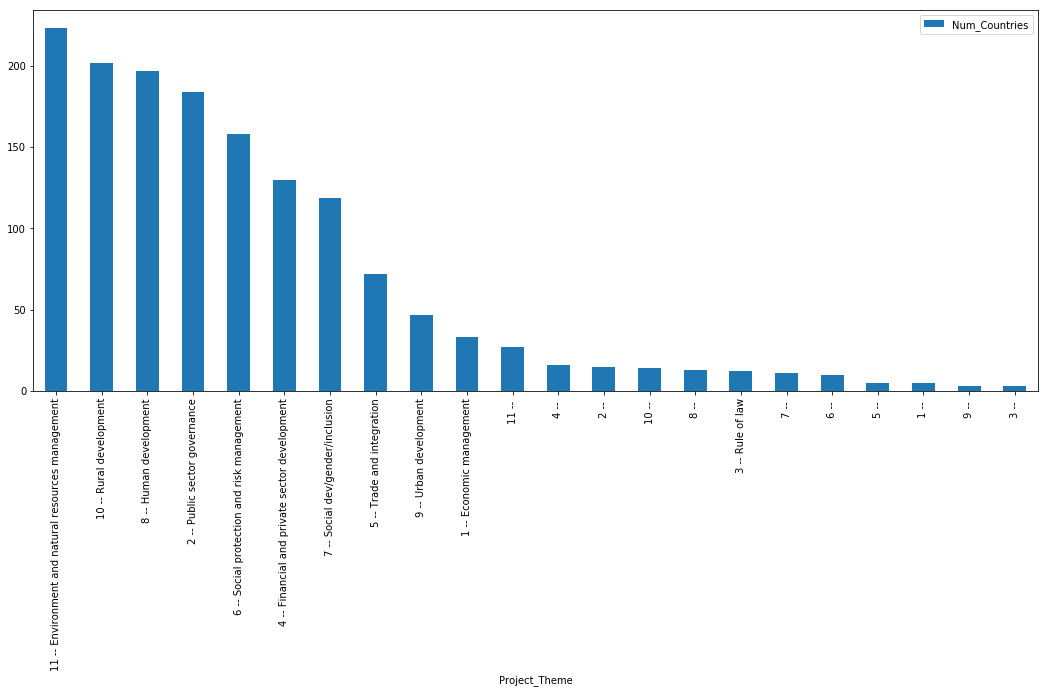

In [6]:
proj_codes_df.plot(kind='bar',figsize=(18,7))

In [7]:
#Plot above shows that some codes have missing values

#Build dictionary with filled missing names:
theme_codes = {}
for i in proj_data.mjtheme_namecode:
    if isIterable(i):
        for j in i:
            if (j['code'] not in theme_codes) & (j['name'] != ''):
                theme_codes[j['code']] = j['name']
            else:
                pass

#Repeat the same process above with filled names dictionary
filled_proj_codes = {}
for i in proj_data.mjtheme_namecode:
    if isIterable(i):
        for j in i:
            if j['code'] + ' -- ' + theme_codes[j['code']] in filled_proj_codes:
                filled_proj_codes[j['code'] + ' -- ' + theme_codes[j['code']]] += 1
            else:
                filled_proj_codes[j['code'] + ' -- ' + theme_codes[j['code']]] = 1
            

# Convert the value counts series into dataframe for displaying results and plotting 
filled_proj_codes_df = pd.DataFrame(list(filled_proj_codes.items()))
filled_proj_codes_df.columns = ['Project_Theme','Num_Countries']
filled_proj_codes_df = filled_proj_codes_df.set_index('Project_Theme')
filled_proj_codes_df = filled_proj_codes_df.sort_values(by='Num_Countries', ascending=False)

filled_proj_codes_df.head(10)

,Num_Countries
Project_Theme,
11 -- Environment and natural resources management,250
10 -- Rural development,216
8 -- Human development,210
2 -- Public sector governance,199
6 -- Social protection and risk management,168
4 -- Financial and private sector development,146
7 -- Social dev/gender/inclusion,130
5 -- Trade and integration,77
9 -- Urban development,50


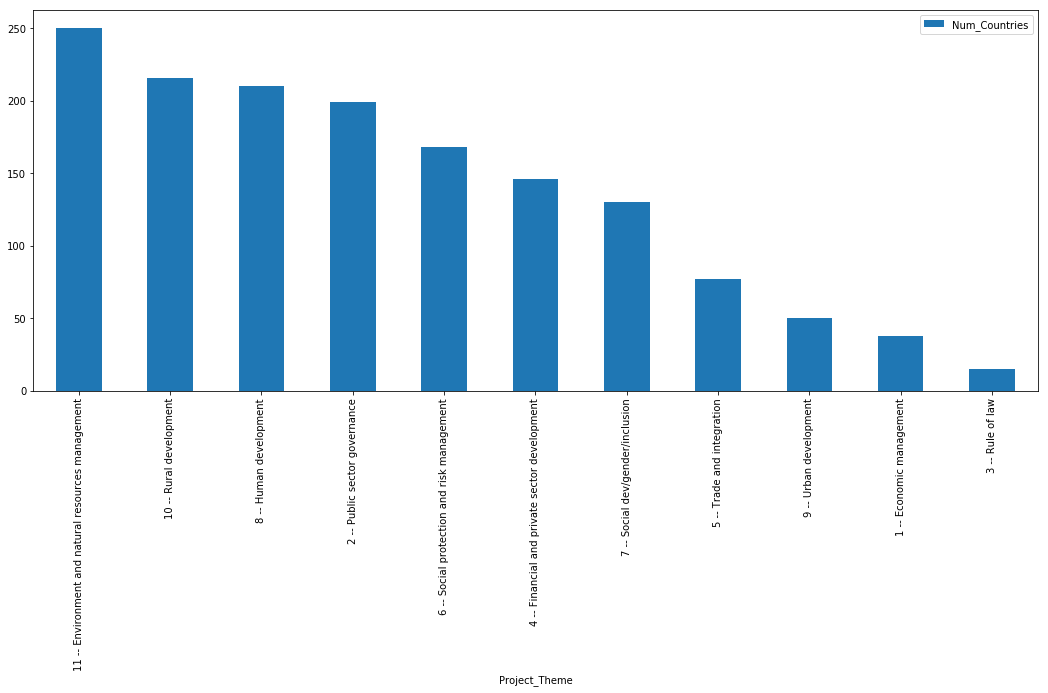

In [8]:
filled_proj_codes_df.plot(kind='bar',figsize=(18,7))

The plot shows number of project themes with filled values